In [ ]:
import torch
import numpy

import h5py
import matplotlib.pyplot as plt

import math as mt
import numpy as np

In [2]:
#file = "/nobackup/scoc/variable_autoregression/generate_data/takamoto_dataset/burgersEq/1D_Burgers_Sols_Nu0.01.npy"
file_1 = "/nobackup/scoc/variable_autoregression/dataset/data/B1/1D_Burgers_Sols_Nu0.01_K1_N2_Sa2100.npy"
file_2 = "/nobackup/scoc/variable_autoregression/dataset/data/B1/1D_Burgers_Sols_Nu0.01_K2_N2_Sa2100.npy"
file_3 = "/nobackup/scoc/variable_autoregression/dataset/data/B1/1D_Burgers_Sols_Nu0.01_K3_N2_Sa2100.npy"
file_4 = "/nobackup/scoc/variable_autoregression/dataset/data/B1/1D_Burgers_Sols_Nu0.01_K4_N2_Sa2100.npy"

In [3]:
hdf5_train_file_1 = np.load(file_1)
hdf5_train_file_2 = np.load(file_2)
hdf5_train_file_3 = np.load(file_3)
hdf5_train_file_4 = np.load(file_4)

In [4]:
hdf5_train_file_1.shape

(1, 2100, 201, 1024)

In [9]:
print(hdf5_train_file_1[0,:,:].std(-1).mean())

0.08513365


In [10]:
print(hdf5_train_file_2[0,:,:].std(-1).mean())

0.11297998


In [11]:
print(hdf5_train_file_3[0,:,:].std(-1).mean())

0.113035455


In [12]:
print(hdf5_train_file_4[0,:,:].std(-1).mean())

0.10540387


In [24]:
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/variable_time/B1_1/run_2/run_2_proto_1.pt"
test = torch.load(file_loc, map_location="cpu")
print(test.keys())
prediction_B1 = test["train_cons_ro_250"][1]
actual_B1 = test["train_cons_ro_250"][2]

dict_keys(['train_cons_oto_250', 'train_cons_ro_250', 'train_var_oto_250', 'train_var_ro_250', 'test_var_oto_250', 'test_var_ro_250'])


In [26]:
train_tensor =  train_loaded_data.squeeze()
train_data = torch.from_numpy(train_tensor).float()
train_data = train_data - train_data.mean(-1).unsqueeze(-1)
train_data = train_data[...,::4]
x_train = train_data[:32,...].permute(0,2,1)

In [18]:
t_sample_space = torch.arange(201)
t_sample_space

tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
         42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
         70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
        112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
        140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
        154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 1

In [25]:
t_sample_space = t_sample_space.unsqueeze(0).repeat(16,1)
t_sample_space.shape

torch.Size([16, 201])

In [26]:
data = x_train
print(data.shape)
xy = torch.gather(data, -1, t_sample_space.unsqueeze(1).repeat((1,data.shape[1],1)) )
print(xy.shape)

torch.Size([16, 256, 201])
torch.Size([16, 256, 201])


In [33]:
x_train.shape

torch.Size([16, 256, 201])

In [25]:
x_train.shape

torch.Size([16, 256, 201])

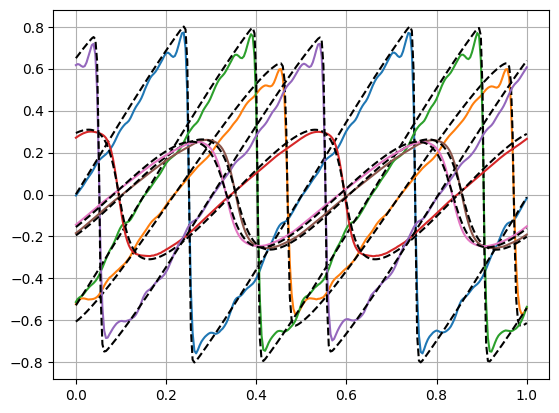

In [31]:
t = [i for i in range(0,32,5)]
tt= 0
for i in t:
    #plt.plot(torch.linspace(0,1,256), xy[i,:,0+10])
    plt.plot(torch.linspace(0,1,256), prediction_B1[i,:,tt], )
    plt.plot(torch.linspace(0,1,256), actual_B1[i,:,tt], "k--" )
    #plt.plot(torch.linspace(0,1,256), x_train[i,:,tt+10], "k--")
    #plt.plot(torch.linspace(0,1,256), actual_B1[i,:,0], )
    #plt.plot(torch.linspace(0,1,1024), train_loaded_data[i,0,:], "k--")

plt.grid()

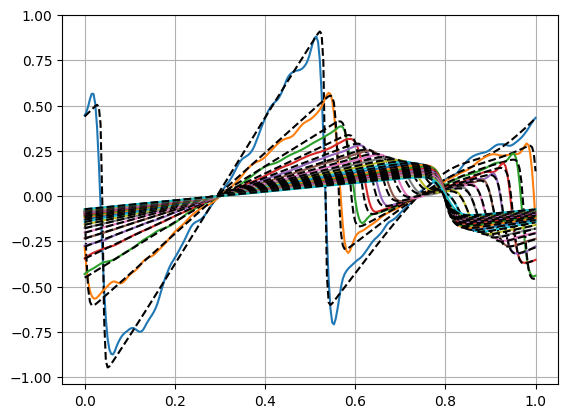

In [23]:
t = [ii for ii in range(0,191,10)]
samp = 6
for i in t:
    plt.plot(torch.linspace(0,1,256), prediction_B1[samp,:,i])
    plt.plot(torch.linspace(0,1,256), actual_B1[samp,:,i], "k--")
plt.grid()

## random

In [8]:
!export JAX_PLATFORMS="cpu" 

/home/home02/scoc/.conda/envs/benchmark_dataset/lib/python3.9/pty.py:85: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [13]:
from jax import random, nn
import numpy as np

In [31]:
init_key = 2048
numbers= 10
num_choise_k = 2
k_tot = 4
xL = 0
xR = 1
nx = 1024
dx = 0.01

In [32]:
xe = np.linspace(xL, xR, nx + 1)
# cell center coordinate
xc = xe[:-1] + 0.5 * dx

In [35]:
key = random.PRNGKey(init_key)

selected = random.randint(key, shape=[numbers, num_choise_k], minval=0, maxval=k_tot)
selected = nn.one_hot(selected, k_tot, dtype=int).sum(axis=1)
# kk = np.pi * 2. * np.arange(1, k_tot + 1) * selected / (xc[-1] - xc[0])
# #import pdb; pdb.set_trace()
# #print(kk)
# amp = random.uniform(key, shape=[numbers, k_tot, 1])

# key, subkey = random.split(key)

# phs = 2. * np.pi * random.uniform(key, shape=[numbers, k_tot, 1])
# #_u = amp * jnp.sin(kk[:, :, jnp.newaxis] * xc[jnp.newaxis, jnp.newaxis, :] + phs)
# u = amp * np.sin(kk[:, :, np.newaxis] * xc[np.newaxis, np.newaxis, :] + phs*selected[:,:,np.newaxis]) # each init same centered at zero
# _u = np.sum(u, axis=1)

In [34]:
selected

Array([[3, 2],
       [1, 2],
       [0, 0],
       [3, 2],
       [1, 0],
       [1, 0],
       [1, 1],
       [2, 3],
       [2, 1],
       [2, 1]], dtype=int32)

In [36]:
selected

Array([[0, 0, 1, 1],
       [0, 1, 1, 0],
       [2, 0, 0, 0],
       [0, 0, 1, 1],
       [1, 1, 0, 0],
       [1, 1, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 1, 1],
       [0, 1, 1, 0],
       [0, 1, 1, 0]], dtype=int32)

In [37]:
np.arange(1, k_tot + 1)

array([1, 2, 3, 4])

In [38]:
np.pi * 2. * np.arange(1, k_tot + 1) 

array([ 6.28318531, 12.56637061, 18.84955592, 25.13274123])

In [39]:
np.pi * 2. * np.arange(1, k_tot + 1) * selected / (xc[-1] - xc[0])

Array([[ 0.       ,  0.       , 18.867981 , 25.15731  ],
       [ 0.       , 12.578655 , 18.867981 ,  0.       ],
       [12.578655 ,  0.       ,  0.       ,  0.       ],
       [ 0.       ,  0.       , 18.867981 , 25.15731  ],
       [ 6.2893276, 12.578655 ,  0.       ,  0.       ],
       [ 6.2893276, 12.578655 ,  0.       ,  0.       ],
       [ 0.       , 25.15731  ,  0.       ,  0.       ],
       [ 0.       ,  0.       , 18.867981 , 25.15731  ],
       [ 0.       , 12.578655 , 18.867981 ,  0.       ],
       [ 0.       , 12.578655 , 18.867981 ,  0.       ]], dtype=float32)

## PDF distribution

In [1]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns


/home/home02/scoc/.conda/envs/env_phd/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


TypeError: __init__() got an unexpected keyword argument 'linewidth'

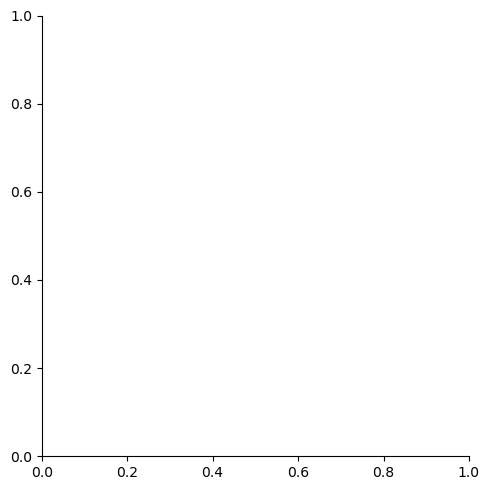

In [2]:
# Sample PyTorch tensor
data = torch.randn(1000)  # Replace with your actual data

# Convert tensor to NumPy array
data_np = data.numpy()

# Plot the PDF using seaborn
sns.displot(data_np, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('PDF of the Data')
plt.show()

In [3]:
import torch
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np

/home/home02/scoc/.conda/envs/env_phd/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
file_1 = "/nobackup/scoc/variable_autoregression/dataset/data/B1/1D_Burgers_Sols_Nu0.01_K1_N2_Sa2100.npy"
file_2 = "/nobackup/scoc/variable_autoregression/dataset/data/B1/1D_Burgers_Sols_Nu0.01_K2_N2_Sa2100.npy"
file_3 = "/nobackup/scoc/variable_autoregression/dataset/data/B1/1D_Burgers_Sols_Nu0.01_K3_N2_Sa2100.npy"
file_4 = "/nobackup/scoc/variable_autoregression/dataset/data/B1/1D_Burgers_Sols_Nu0.01_K4_N2_Sa2100.npy"

In [11]:
hdf5_train_file_1 = np.load(file_1)
hdf5_train_file_2 = np.load(file_2)
hdf5_train_file_3 = np.load(file_3)
hdf5_train_file_4 = np.load(file_4)

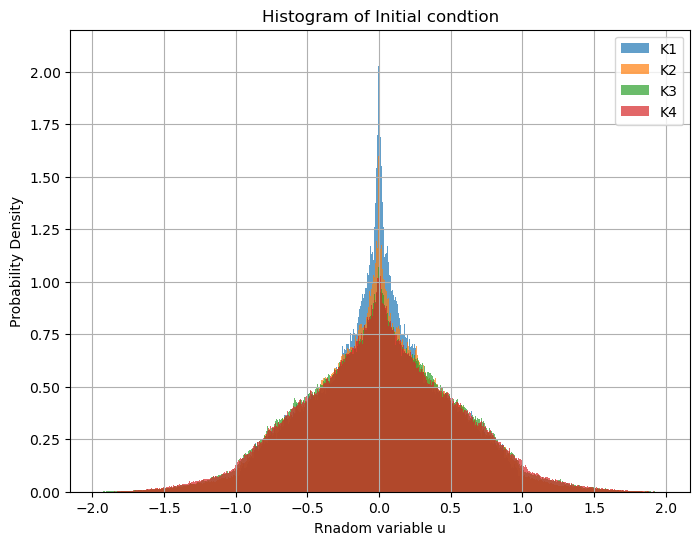

In [25]:
# Sample PyTorch tensor
data_1 = hdf5_train_file_1[:,:,0,:].flatten()  # Example: 1000 samples from standard normal distribution
data_2 = hdf5_train_file_2[:,:,0,:].flatten()
data_3 = hdf5_train_file_3[:,:,0,:].flatten() 
data_4 = hdf5_train_file_4[:,:,0,:].flatten() 
# Convert tensor to NumPy array for compatibility with matplotlib
#data_np = data.numpy()

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(data_1, bins=1000, density=True, alpha=0.7, label="K1")  # Adjust bins as needed
plt.hist(data_2, bins=1000, density=True, alpha=0.7, label="K2")  # Adjust bins as needed
plt.hist(data_3, bins=1000, density=True, alpha=0.7, label="K3")  # Adjust bins as needed
plt.hist(data_4, bins=1000, density=True, alpha=0.7, label="K4")  # Adjust bins as needed
plt.xlabel('Rnadom variable u')
plt.ylabel('Probability Density')
plt.title('Histogram of Initial condtion')
plt.ylim([0,2.2])
plt.legend(["K1", "K2", "K3", "K4"])
plt.grid()

plt.show()

In [12]:
#data = torch.randn(1000)

# Convert to NumPy array
data_np_1 = hdf5_train_file_1[:,:,0,:].flatten() 
data_np_2 = hdf5_train_file_2[:,:,0,:].flatten() 
data_np_3 = hdf5_train_file_3[:,:,0,:].flatten() 
data_np_4 = hdf5_train_file_4[:,:,0,:].flatten() 


# Estimate PDF using KDE
kde_1 = gaussian_kde(data_np_1 )
x_grid_1 = np.linspace(data_np_1.min(), data_np_1.max(), 500)
pdf_1 = kde_1(x_grid_1)

kde_2 = gaussian_kde(data_np_2 )
x_grid_2 = np.linspace(data_np_2.min(), data_np_2.max(), 500)
pdf_2 = kde_2(x_grid_2)


kde_3 = gaussian_kde(data_np_3 )
x_grid_3 = np.linspace(data_np_3.min(), data_np_3.max(), 500)
pdf_3 = kde_2(x_grid_3)


kde_4 = gaussian_kde(data_np_4 )
x_grid_4 = np.linspace(data_np_4.min(), data_np_4.max(), 500)
pdf_4 = kde_2(x_grid_4)


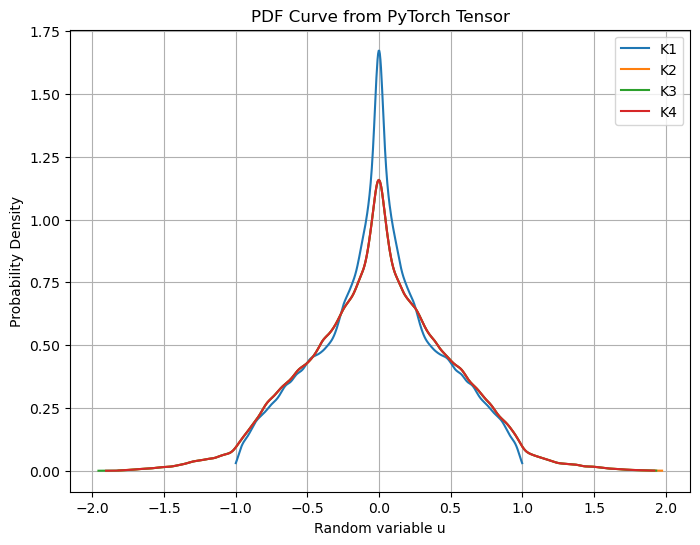

In [17]:
# Plot the curve (estimated PDF)
plt.figure(figsize=(8, 6))
plt.plot(x_grid_1, pdf_1)
plt.plot(x_grid_2, pdf_2)  
plt.plot(x_grid_3, pdf_3)
plt.plot(x_grid_4, pdf_4)  
plt.xlabel('Random variable u')
plt.ylabel('Probability Density')
plt.legend(["K1", "K2", "K3", "K4"])
plt.title('PDF Curve from PyTorch Tensor')
plt.grid()
plt.show()